In [49]:
print(Fore.BLUE + '####################################\n# Welcome to the SalivaPrint tool. #\n#----------------------------------#\n#        Type [y] to start.        #\n####################################')
choice=''
choice = input()
if choice=='y':
    print('-> Data Extraction from XML file.<-\n')
else:
    print('Stop')
    return

####################################
# Welcome to the SalivaPrint tool. #
#----------------------------------#
#        Type [y] to start.        #
####################################


SyntaxError: 'return' outside function (<ipython-input-49-ae79e4eb0624>, line 8)

In [61]:
print(Fore.GREEN + '####################################################################\n# Do you want to contine to peak area determining and calculation? #\n#------------------------------------------------------------------#\n#                         Type [y] to start.                       #\n####################################################################')
choice=''
choice = input()
if choice=='y':
    print('Continue')
else:
    print('Stop')

####################################################################
# Do you want to contine to peak area determining and calculation? #
#------------------------------------------------------------------#
#                         Type [y] to start.                       #
####################################################################
Stop


In [19]:
print('\033[34m' + '####################################\n# Welcome to the SalivaPrint tool. #\n#----------------------------------#\n#        Type [y] to start.        #\n####################################')

####################################
# Welcome to the SalivaPrint tool. #
#----------------------------------#
#        Type [y] to start.        #
####################################


In [47]:
from cmd import Cmd

In [49]:
class MyPrompt(Cmd):
    intro = 'Welcome to the SalivaPrint tool.\n--------------------------------\nType help or ? to list commands.\n'
    prompt = '(MyPrompt) '
    # file = None
    def do_exit(self, inp):
        '''exit the application.'''
        print("Bye")
        return True
 
    def do_start(self, inp):
        print('Data Extraction start')
        return True
 
    def help_add(self):
       print("Add a new XML file to the system.")
 
MyPrompt().cmdloop()

Welcome to the SalivaPrint tool.
--------------------------------
Type help or ? to list commands.


Documented commands (type help <topic>):
exit  help

Miscellaneous help topics:
add

Undocumented commands:
start


Documented commands (type help <topic>):
exit  help

Miscellaneous help topics:
add

Undocumented commands:
start


Documented commands (type help <topic>):
exit  help

Miscellaneous help topics:
add

Undocumented commands:
start


Documented commands (type help <topic>):
exit  help

Miscellaneous help topics:
add

Undocumented commands:
start


Documented commands (type help <topic>):
exit  help

Miscellaneous help topics:
add

Undocumented commands:
start


Documented commands (type help <topic>):
exit  help

Miscellaneous help topics:
add

Undocumented commands:
start


Documented commands (type help <topic>):
exit  help

Miscellaneous help topics:
add

Undocumented commands:
start


Documented commands (type help <topic>):
exit  help

Miscellaneous help topics:
add

Un

In [1]:
import os, csv, re, glob, math, collections, sys, codecs
import xml.etree.ElementTree as ET
from matplotlib import pylab as plt
import matplotlib.pyplot as plot
import pandas as pd
from io import BytesIO
import numpy as np
import pandas as pd
from scipy import signal
from scipy.signal import find_peaks
from scipy import stats
%matplotlib inline

In [2]:
# Createa csv data from xml source
full_xml_path = os.path.abspath(os.path.join(".", "test.xml"))
full_csv_path = os.path.abspath(os.path.join(".", "Samples.csv"))


tree = ET.parse(full_xml_path)
root = tree.getroot()

file_header = ['Sample']
file_header_vals = []
sample_well_info = []

In [3]:
# Set File Header
for i in range(466, 869):
    file_header.append(str(round((0.00042006 * (i * i) - 0.28216 * i + 49.225), 1)))
    file_header_vals.append(str(round((0.00042006 * (i * i) - 0.28216 * i + 49.225), 1)))


In [4]:
# get all well id's and sample names from file
for sample in root.findall('Results'):
    # write sample name
    well_id = sample.find('WellId').text

    if well_id != '0':
        sample_name = sample.find('SampleName').text
        sample_well_info.append({'Sample': sample_name, 'well_id': well_id})

In [5]:
# create file with headers and data
with open(full_csv_path, 'w', newline='') as outcsv:
    writer = csv.DictWriter(outcsv, fieldnames = file_header)
    writer.writeheader()
    xmlstr = ET.tostring(root, encoding='utf8', method='xml').decode("utf-8")

    for elem in sample_well_info:
        
        idx = 0
        row = {'Sample': elem['Sample']}
        regex= '<RawDataPoints><WellId>%s<\/WellId><Signal>(.*?)<\/Signal><\/RawDataPoints>'% elem['well_id']
        raw_data_points = re.findall(regex, xmlstr)
        
        # write data for each column
        for count, raw_data_point in enumerate(raw_data_points, start=0):
            if 869 >= count >= 467:
                row[file_header_vals[idx]] = raw_data_point
                idx+=1
            
            if count > 869:
                break
        
        writer.writerow(row)

In [9]:
df = pd.read_csv('Samples.csv', index_col='Sample')
df.head(2)



,9.0,9.1,9.2,9.3,9.4,9.5,9.6,9.7,9.9,10.0,...,116.8,117.2,117.7,118.1,118.6,119.0,119.5,119.9,120.3,120.8
Sample,,,,,,,,,,,,,,,,,,,,,
D1406,-62.244672,-52.457014,-42.210655,-32.204871,-23.491503,-16.696638,-12.193077,-9.994839,-9.813816,-11.251397,...,-0.181758,-0.462081,-0.843100,-1.052588,-1.271526,-1.538121,-1.750944,-1.938444,-2.147266,-2.379568
D1406,-81.605963,-73.379503,-63.529882,-53.410731,-43.921040,-36.125306,-30.061558,-25.768962,-23.334017,-22.874460,...,-0.506436,-0.942482,-1.277635,-1.309136,-1.309286,-1.428850,-1.641247,-1.864567,-2.057687,-2.290072


In [10]:
df2 = df.T
df2.to_csv('output.csv')
df2.head(2)

Sample,D1406,D1406,D1202,D1202,D1411,D1411,D1388,D1388,D1401,D1401,...,D1466,D1466,D1468,D1468,D612,D612,D1396,D1396,D1261,D1261
9.0,-62.244672,-81.605963,-54.015308,-36.074493,-23.297790,-27.324418,-29.349970,-37.304845,-40.970857,-46.314839,...,13.897055,17.551048,9.597105,10.210088,35.817805,35.567830,23.242946,0.941163,-4.593666,-10.410634
9.1,-52.457014,-73.379503,-65.326773,-51.368412,-41.467826,-48.814018,-58.063246,-63.327068,-69.265171,-72.897337,...,19.862534,22.093262,12.218021,10.964291,23.764834,27.358699,18.832955,0.704344,-4.239124,-5.997571


In [13]:
plt.style.available

['_classic_test',
 'seaborn',
 'dark_background',
 'seaborn-paper',
 'ggplot',
 'seaborn-darkgrid',
 'seaborn-colorblind',
 'bmh',
 'seaborn-dark',
 'seaborn-muted',
 'fivethirtyeight',
 'seaborn-ticks',
 'classic',
 'seaborn-talk',
 'seaborn-white',
 'grayscale',
 'tableau-colorblind10',
 'seaborn-pastel',
 'seaborn-poster',
 'seaborn-deep',
 'seaborn-dark-palette',
 'seaborn-whitegrid',
 'seaborn-bright',
 'seaborn-notebook',
 'Solarize_Light2',
 'fast']

Text(0, 0.5, 'Fluorescence')

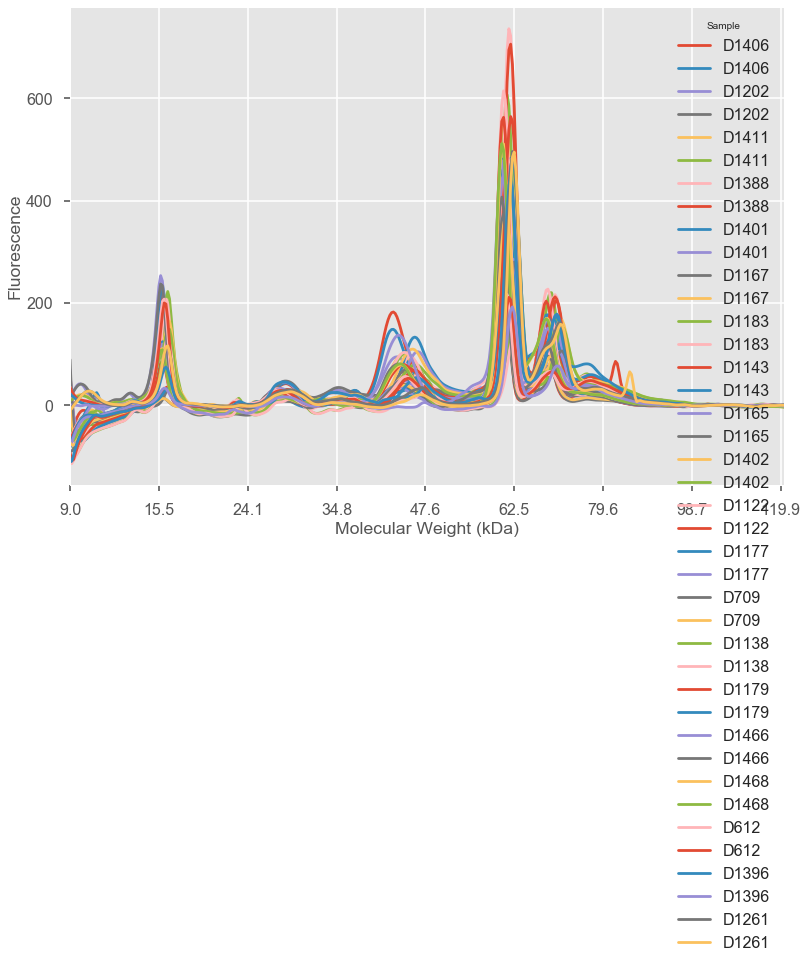

In [34]:
ax = df2.plot()
ax.set_xlabel('Molecular Weight (kDa)')
ax.set_ylabel('Fluorescence')